In [1]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = v1 @ v2
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    return dot_product/l2_norm

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
           'if you take the red pill, you stay in Wonderland',
           'if you take the red pill, I show you how deep the rabiit hole goes']

tv = TfidfVectorizer()
simple = tv.fit_transform(doc_list)
print(simple.shape)

(3, 18)


In [3]:
dense = simple.todense()

v1 = np.array(dense[0]).reshape(-1, )
v2 = np.array(dense[1]).reshape(-1, )
v1

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
       0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
       0.49087711, 0.        , 0.24543856])

In [4]:
v2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
       0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
       0.23402865, 0.39624495, 0.4680573 ])

In [5]:
dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

In [6]:
similarity = cos_similarity(v1, v2)
similarity

0.4020775821495014

In [7]:
v3 = np.array(dense[2]).reshape(-1, )

similarity = cos_similarity(v1, v3)
similarity

0.40425044775948626

In [8]:
similarity = cos_similarity(v2, v3)
similarity

0.45647296026166395

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

pair = cosine_similarity(simple[0], simple)
pair

array([[1.        , 0.40207758, 0.40425045]])

In [10]:
pair = cosine_similarity(simple[0], simple[1:])
pair

array([[0.40207758, 0.40425045]])

In [11]:
pair = cosine_similarity(simple, simple)
pair

array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [13]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = os.path.expanduser('~') + '/temp/topics'
all_files = glob.glob(os.path.join(path, '*.data'))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/home/arti/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
hotel_indexes = document_df[document_df['cluster_label']==2].index
print(hotel_indexes)
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print(comparison_docname)
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

Int64Index([10, 11, 15, 16, 18, 21, 25, 26, 29, 31, 32, 34, 36, 39, 46, 50], dtype='int64')
bathroom_bestwestern_hotel_sfo
[[1.         0.05221059 0.32619948 0.06189595 0.38038865 0.51442299
  0.0430688  0.05846178 0.1386783  0.13989623 0.11742762 0.09518068
  0.06193118 0.03638665 0.11282857 0.07049362]]


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

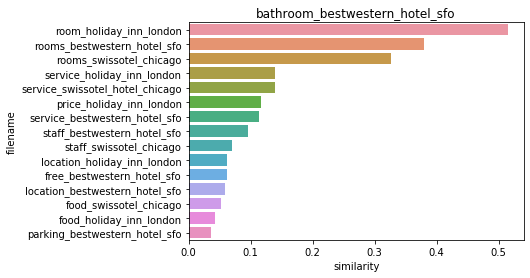

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

hotel_sorted = hotel_indexes[sorted_index.reshape(-1)]

hotel_1 = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1 = hotel_1[1:]

df = pd.DataFrame()
df['filename'] = document_df.iloc[hotel_sorted]['filename']
df['similarity'] = hotel_1

sns.barplot(x='similarity', y='filename', data=df)
plt.title(comparison_docname)